# Computer Vision - P3

## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in **English**. 

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in **English**.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently. 

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.

**Deadline (Campus Virtual): Group A & F: November 7th, 23:00 h; Group B: November 14th, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



In [1]:
import numpy as np
import skimage
from skimage import io, img_as_float, color
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.segmentation import felzenszwalb, mark_boundaries, slic, quickshift
from skimage.transform import resize
from skimage.util import random_noise
from skimage.feature import canny
from skimage.color import rgb2gray, gray2rgb

## 3.1 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images_notebook/image_Segmentation.png" width=600>

### Felzenszwalb's efficient graph based segmentation

a) Read 'barcelona.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.

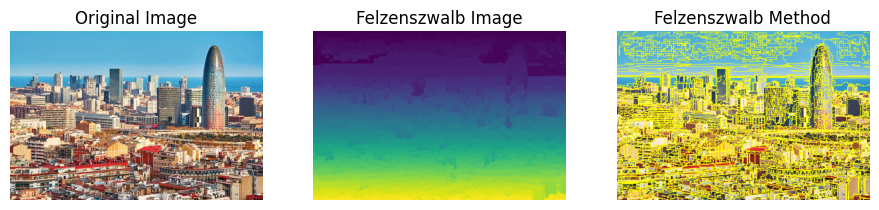

In [24]:
barcelona_image = io.imread('images_notebook/barcelona.jpeg')

#Float image
barcelona_image = img_as_float(barcelona_image)

#Felzeszwalb Image
barcelona_felzenszwalb = felzenszwalb(barcelona_image, scale=100, sigma=0.5, min_size=50)

#Felzenszwalb Method Image
barcelona_boundaries = mark_boundaries(barcelona_image, barcelona_felzenszwalb)

#FLOAT IMAGE
plt.figure(figsize=(15, 15))
plt.subplot(1,4,1)
plt.imshow(barcelona_image)
plt.axis('off')
plt.title("Original Image")

#FELZESZWALB IMAGE
plt.subplot(1,4,2)
plt.imshow(barcelona_felzenszwalb)
plt.axis('off')
plt.title("Felzenszwalb Image")

#FELZESZWALB METHOD IMAGE
plt.subplot(1,4,3)
plt.imshow(barcelona_boundaries)
plt.axis('off')
plt.title("Felzenszwalb Method")

plt.show()

b) Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


Answer the following questions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
    - For this method, its not critical to convert it in grayscale, but you need to take into account the color and the intensity differences
- Is it critical to convert the image in float in order to do the image segmentation?
    - Its better convert the image in float for the image segmentation in the Felzenszwalb method because you can ensure better the data types. For that reason, its not critical, and you avoid issues with representation
- Which are the optimal values according to your subjective perception?
    - Depends on the image, its not a optimal values but i setup the values with normal values (scale=100, sigma=0.5, min_size=50), and if you want to change this values you can do it in the call of the method
- How does each parameter behave?
    - Scale: Size of segments
    - Sigma: Smooth the image, if you want a segments more sensitive for details, you need to have a low sigma
    - Min_size: The minimum segment size.
- Does the image reduction affect the optimal values?
    - Yes, with the reduction of the image, you may need to adjust the parameters for mantain the segmentation detail.

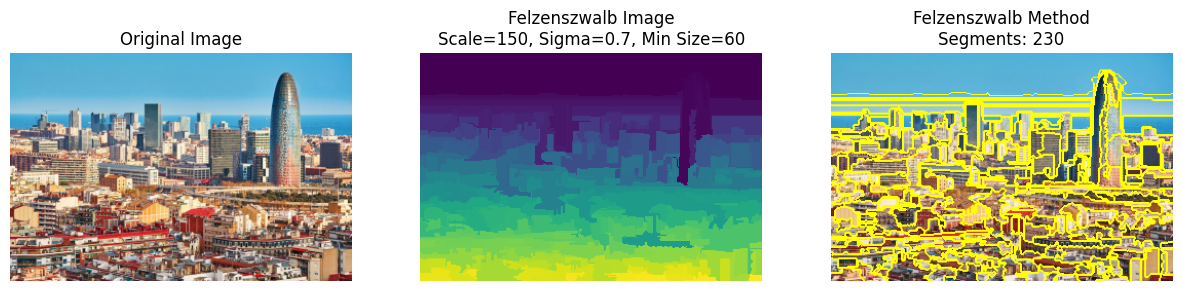

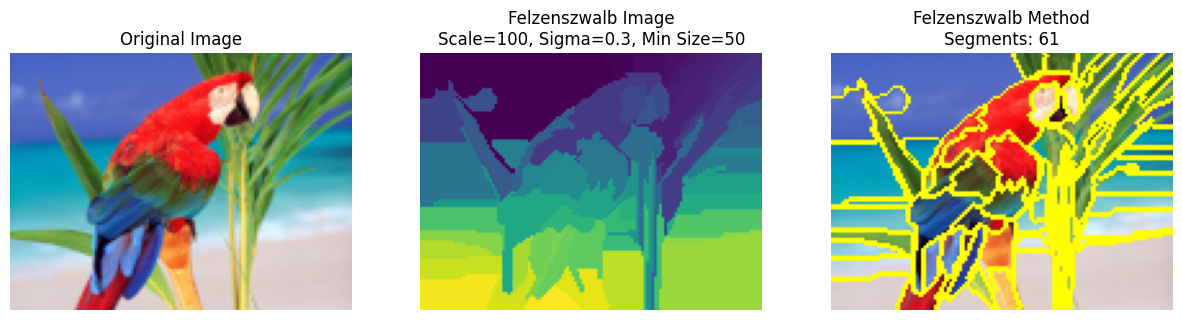

In [25]:
def felzenszwalb_image_segmentation(img_path, scale=100, sigma=0.5, min_size=50):

    img = io.imread(img_path)
    # 3rd part of image
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))

    # FELZENSZWALB METHOD
    resized_image = img_as_float(resized_image)
    felzenszwalb_image = felzenszwalb(resized_image, scale=scale, sigma=sigma, min_size=min_size)
    boundaries = mark_boundaries(resized_image, felzenszwalb_image)

    plt.figure(figsize=(15, 5))

    #3RD PART IMAGE
    plt.subplot(1, 3, 1)
    plt.imshow(resized_image)
    plt.axis('off')
    plt.title("Original Image")

    #FELZENSZWALB IMAGE
    plt.subplot(1, 3, 2)
    plt.imshow(felzenszwalb_image)
    plt.axis('off')
    plt.title(f"Felzenszwalb Image\nScale={scale}, Sigma={sigma}, Min Size={min_size}")

    #FELZENSZWALB METHOD IMAGE
    plt.subplot(1, 3, 3)
    plt.imshow(boundaries)
    plt.axis('off')
    plt.title(f"Felzenszwalb Method\nSegments: {len(np.unique(felzenszwalb_image))}")

    plt.show()

path = 'images_notebook/barcelona.jpeg'
felzenszwalb_image_segmentation(img_path=path, scale=150, sigma=0.7, min_size=60)

path2 = 'images_notebook/loro.png'
felzenszwalb_image_segmentation(img_path=path2, sigma=0.3)


c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

- The Felzenszwalb Method is an image segmentation algorithm that groups pixels into segments based on differences in color and intensity. It is advantageous to use a low sigma value for better segmentation. The method's strengths include its simplicity and effectiveness in capturing segments of various sizes. However, one of its limitations is that it may not perform well on images with complex textures, such as the Barcelona Image.

### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

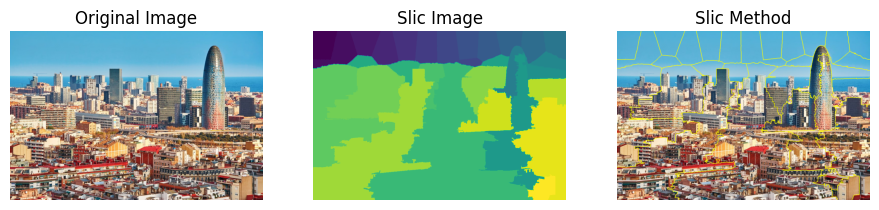

In [26]:
barcelona_image = io.imread('images_notebook/barcelona.jpeg')

#Float image
barcelona_image = img_as_float(barcelona_image)

#Slic Image
barcelona_slic = slic(barcelona_image, start_label=1)

#Slic Method Image
barcelona_boundaries_slic = mark_boundaries(barcelona_image, barcelona_slic)

#FLOAT IMAGE
plt.figure(figsize=(15, 15))
plt.subplot(1,4,1)
plt.imshow(barcelona_image)
plt.axis('off')
plt.title("Original Image")

#FELZESZWALB IMAGE
plt.subplot(1,4,2)
plt.imshow(barcelona_slic)
plt.axis('off')
plt.title("Slic Image")

#FELZESZWALB METHOD IMAGE
plt.subplot(1,4,3)
plt.imshow(barcelona_boundaries_slic)
plt.axis('off')
plt.title("Slic Method")

plt.show()

Create a function where you explore at least 3 different parameter combinations in order to obtain a better image segmentation. Your function should receive the image and the set of parameters you would like to change. It should also resize your image to be a third part of the original image size. Your function results should be a visualization of the results and a print of the number of segments.  


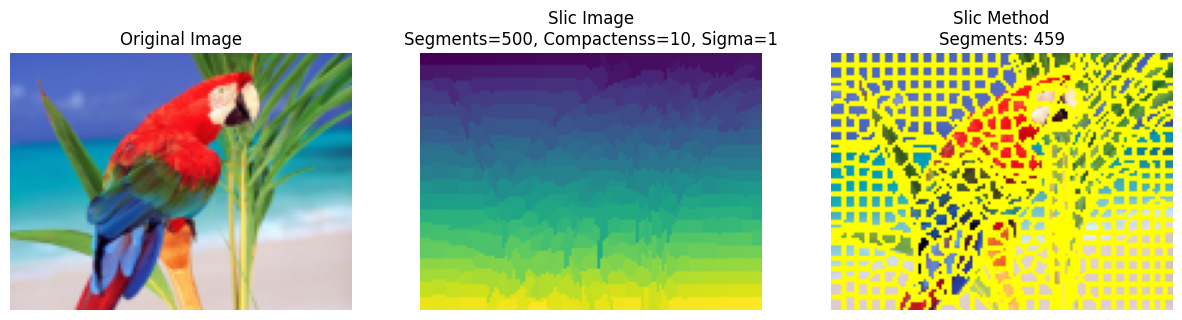

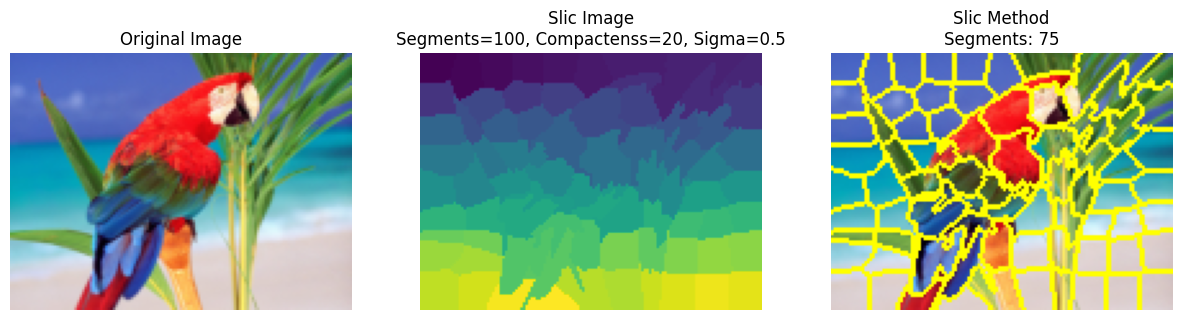

In [37]:
def slic_image_segmentation(img_path, segments = 100, compactness = 10, sigma = 0.5, start_label = 1):
    img = io.imread(img_path)
    # 3rd part of image
    resized_image = resize(img, (img.shape[0] // 3, img.shape[1] // 3))

    # SLIC METHOD
    resized_image = img_as_float(resized_image)
    slic_image = slic(resized_image, n_segments=segments, compactness=compactness, sigma=sigma, start_label=start_label)
    boundaries = mark_boundaries(resized_image, slic_image)

    plt.figure(figsize=(15, 5))

    #3RD PART IMAGE
    plt.subplot(1, 3, 1)
    plt.imshow(resized_image)
    plt.axis('off')
    plt.title("Original Image")

    #SLIC IMAGE
    plt.subplot(1, 3, 2)
    plt.imshow(slic_image)
    plt.axis('off')
    plt.title(f"Slic Image\nSegments={segments}, Compactenss={compactness}, Sigma={sigma}")

    #SLIC METHOD IMAGE
    plt.subplot(1, 3, 3)
    plt.imshow(boundaries)
    plt.axis('off')
    plt.title(f"Slic Method\nSegments: {len(np.unique(slic_image))}")

    plt.show()

path='images_notebook/loro.png'
slic_image_segmentation(path, segments=500, sigma=1)
slic_image_segmentation(path, compactness=20)

f) Comment what the algorithm is (in up to 3 lines).

The SLIC (Simple Linear Iterative Clustering) method is an image segmentation algorithm that groups pixels into superpixels based on color similarity and spatial proximity (compactness). It is advantageous in providing fine-grained segmentation control over segment size and shape, while maintaining good computational efficiency. However, parameter selection can significantly impact the segmentation result

### Quickshift image segmentation

g) Segment the original image using the Quickshift algorithm. 

Create a loop where you explore kernel_size variations in order to obtain a better image segmentation. Argument why a higher or lower value improves the segmentation results. 


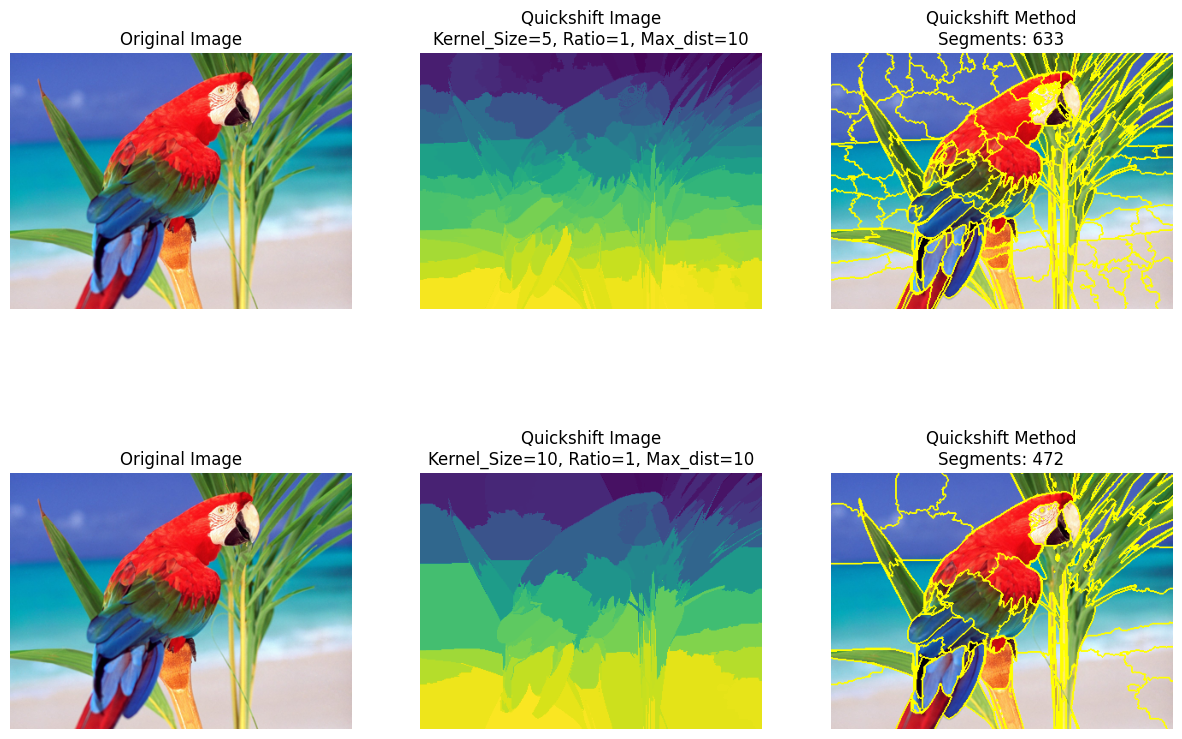

In [86]:
def quickshift_image_segmentation(img_path, kernel_sizes = [5, 10], ratio=1, max_dist=10):
    img = io.imread(img_path)
    # Quickshift METHOD
    img = img_as_float(img)

    #Creation of subplots depending of quantity on kernel_sizes
    num_kernel_sizes = len(kernel_sizes)
    plt.figure(figsize=(15, 5 * num_kernel_sizes))

    for i, kernel_size in enumerate(kernel_sizes, start=1):
        quickshift_image = quickshift(img, kernel_size=kernel_size, ratio=ratio, max_dist=max_dist)
        boundaries = mark_boundaries(img, quickshift_image)

        # Create subplots for each parameter combination
        plt.subplot(num_kernel_sizes, 3, i * 3 - 2)
        plt.imshow(img)
        plt.axis('off')
        plt.title("Original Image")

        plt.subplot(num_kernel_sizes, 3, i * 3 - 1)
        plt.imshow(quickshift_image)
        plt.axis('off')
        plt.title(f"Quickshift Image\nKernel_Size={kernel_size}, Ratio={ratio}, Max_dist={max_dist}")

        plt.subplot(num_kernel_sizes, 3, i * 3)
        plt.imshow(boundaries)
        plt.axis('off')
        plt.title(f"Quickshift Method\nSegments: {len(np.unique(quickshift_image))}")

    plt.show()

path='images_notebook/loro.png'
quickshift_image_segmentation(path)

h) Comment what the algorithm is (in up to 3 lines).

- The Quickshift method is an image segmentation algorithm that groups pixels into superpixels based on color similarity and spatial proximity, similar to the SLIC algorithm. Both are superpixel methods, but Quickshift is simpler to use and faster. In contrast, SLIC offers more control over superpixel shape because it provides a range of parameters that are more specific to segmentation needs

### Comparison of segmentation algorithms

Apply the best set of parameters of each algorithm and apply it to:
1) Original image
2) Salt and pepper noise version of this image
3) Flipped image (horizontally)
4) Canny edge detector result of this image.

Plot the image and its results of fezenswalb and SLIC algorithm in a 1x3 subplots.

- Do the transformations affect the segmentation? Why or why not?
    - Yes, because the transformations alter the pixels values and structural characteristics of the image. For example:
        - Noise: Variations in pixel intensity
        - Flipped: Change the spatial arrangement
        - Canny: More accurate boundaries between segments.
- Can the number of segments can be used as a criterion for the performance of the algorithms?
    - Yes, the number of segments specifies the level of detail, but not should be the unique criterion of the algorithms.

In [88]:
def fezenswalb_slic_quickshift(image, images_variations, i, title, felzenszwalb_params, slic_params, quickshift_params):
    # Felzenszwalb segmentation
    felzenszwalb_seg = felzenszwalb(image, scale=felzenszwalb_params['scale'],
                                     sigma=felzenszwalb_params['sigma'],
                                     min_size=felzenszwalb_params['min_size'])

    felzenszwalb_boundaries = mark_boundaries(image, felzenszwalb_seg)  # Add boundaries

    plt.subplot(len(images_variations), 9, i*9-8)
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)

    plt.subplot(len(images_variations), 9, i*9-7)
    plt.imshow(felzenszwalb_seg)
    plt.axis('off')
    plt.title("Felzenszwalb")

    plt.subplot(len(images_variations), 9, i*9-6)  # Add a subplot for Felzenszwalb boundaries
    plt.imshow(felzenszwalb_boundaries)
    plt.axis('off')
    plt.title("Felzenszwalb Boundaries")

    # SLIC segmentation
    slic_seg = slic(image, n_segments=slic_params['n_segments'],
                    compactness=slic_params['compactness'], multichannel=True)

    slic_boundaries = mark_boundaries(image, slic_seg)  # Add boundaries

    plt.subplot(len(images_variations), 9, i*9-5)
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)

    plt.subplot(len(images_variations), 9, i*9-4)
    plt.imshow(slic_seg)
    plt.axis('off')
    plt.title("SLIC")

    plt.subplot(len(images_variations), 9, i*9-3)  # Add a subplot for SLIC boundaries
    plt.imshow(slic_boundaries)
    plt.axis('off')
    plt.title("SLIC Boundaries")

    # Quickshift segmentation
    quickshift_seg = quickshift(image, kernel_size=quickshift_params['kernel_size'],
                                ratio=quickshift_params['ratio'],
                                max_dist=quickshift_params['max_dist'])

    quickshift_boundaries = mark_boundaries(image, quickshift_seg)

    plt.subplot(len(images_variations), 9, i*9-2)
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)

    plt.subplot(len(images_variations), 9, i*9-1)
    plt.imshow(quickshift_seg)
    plt.axis('off')
    plt.title("Quickshift")

    plt.subplot(len(images_variations), 9, i*9)
    plt.imshow(quickshift_boundaries)
    plt.axis('off')
    plt.title("Quickshift Boundaries")

In [ ]:
def comparision_of_alogirthms(img_path):
    img = img_as_float(img_path)

    images_variations = [
        {'image': img, 'title': 'Original'},
        {'image': random_noise(img, mode='s&p'), 'title': 'Salt and Pepper Noise'},
        {'image': np.fliplr(img), 'title': 'Flipped (Horizontally)'},
        {'image': img_as_float(gray2rgb(canny(rgb2gray(img)))), 'title': 'Canny Edge Detector'}
    ]

    # PARAMETERS OF EACH ALGORITHM
    felzenszwalb_params = {
        'scale': 100,
        'sigma': 0.5,
        'min_size': 50
    }

    slic_params = {
        'n_segments': 500,
        'compactness': 20
    }

    quickshift_params = {
        'kernel_size': 5,
        'ratio': 1,
        'max_dist': 10
    }

    plt.figure(figsize=(25, 5 * len(images_variations)))

    #FOR EACH ONE, WE DO THE FELZENSZWALB, SLIC AND QUICKSHIFT
    for i, item in enumerate(images_variations, start=1):
        image = item['image']
        title = item['title']

        fezenswalb_slic_quickshift(image=image, images_variations=images_variations, i=i, title=title, felzenszwalb_params=felzenszwalb_params, slic_params=slic_params, quickshift_params=quickshift_params)


    plt.subplots_adjust(hspace=0.5)
    plt.show()

img_path = io.imread('images_notebook/barcelona.jpeg')
comparision_of_alogirthms(img_path=img_path)

## 3.2 Segmentation via clustering

In this exercise, you will implement hierarchical clustering to segment the "images_notebook/loro.png" image in gray scales. First load and visualize the image, then implement hierarchical clustering over the pixels and plot the final results side by side to the original image

Hint: Sklearn has a hierarchical clustering implementation you should use. Reshape your dataset such that you have a 2 dimensional array. Use linkage "ward" and grid_to_graph function for the connectivity parameter. 

<img src="images_notebook/loro_segmentation.jpg" width=600>

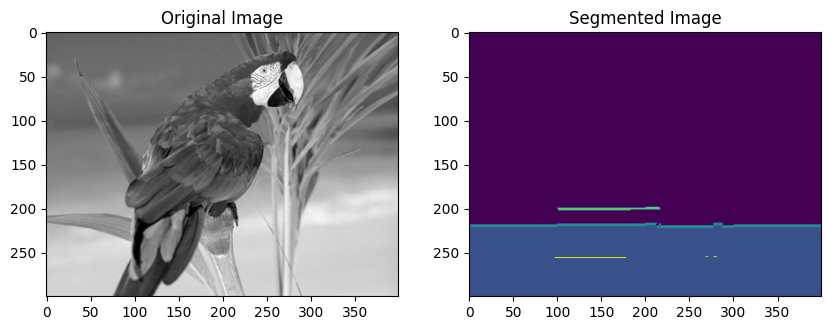

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph

# Load the grayscale image
img = io.imread('images_notebook/loro.png')
gray_img = color.rgb2gray(img)

# Reshape the grayscale image to a 2D array
height, width = gray_img.shape
X = np.reshape(gray_img, (height * width, 1))

# Create connectivity graph
connectivity = grid_to_graph(n_x=width, n_y=height)

# Perform hierarchical clustering using Complete linkage
complete = AgglomerativeClustering(n_clusters=5, connectivity=connectivity, linkage='complete').fit(X)
labels = complete.labels_

# Reshape the labels to match the original image shape
segmented_img = labels.reshape((height, width))


# Plot the original and segmented images with unique colors
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")

plt.show()



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images_notebook/screenshot.png" width=600>

## 3.3 Segmentation of video shots

Read and visualize the sequence of images "images_notebook/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [12]:
# Your solution here

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images_notebook/histogramshot.png" width=600>
<img src="images_notebook/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

The plot above was obtain by using 64 bins histogram and the measure as mean of absolute difference. 

In [13]:
# Your solution here

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [14]:
# Example A
def data_gen():
    return enumerate(mean_differences)


In [15]:
# Your solution here

c) Show the initial and final images of each shot extracted as follows:

<img src="images_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot as shown in the reference image


In [16]:
# Your solution here

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

In [17]:
# Your solution here


e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

In [18]:
# Your solution here


f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

In [19]:
# Your solution here


## 3.4 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images_notebook/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [20]:
# Your solution here

b) What do the static background images represent? 

In [21]:
# Your solution here

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [22]:
# Your solution here

d) What happens if you subtract the background image from the original one?

In [23]:
# Your solution here

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [24]:
# Your solution here

f) Visualize the highest and lowest similarity frame with respect to the foreground images of each scene. You can use the metric of your like, explain why you picked it. 

In [25]:
# Your solution here
